# Курсовая работа 
## на тему
## "Машинное обучение в задачах распознавания голоса"



In [1]:
import numpy as np
import pandas as pd
from io import StringIO

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, cross_val_score

import warnings
warnings.filterwarnings('ignore')

kfold = KFold(n_splits=5)

In [2]:
# Random Forest feature importance Function
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'Importance':m.feature_importances_}
                       ).sort_values('Importance', ascending=False)

In [3]:
# Random Forest feature importance 
def plot_fi(fi):
    return fi.plot('cols', 'Importance', 'barh', figsize=(12,8), legend=False)

## Исследовательский анализ данных

In [4]:
path = "/kaggle/input/voicegender/voice.csv"
voiceDf = pd.read_csv(path)

voiceDf.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
voiceDf.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
voiceDf.shape

(3168, 21)

### Описание набора данных
- Набор данных содержит 21 столбец (20 атрибутов и 1 целевой признак - пол)
- Размеры набора данных: 3168 x 21

- __Цель: Классифицировать пол на основе особенностей голоса.__  

### Признаки и таргет набора данных:
- **meanfreq**: средняя частота (в кГц)
- **sd**: стандартное отклонение частоты
- **median**: медианная частота (в кГц)
- **Q25**: первый квантиль (в кГц)
- **Q75**: третий квантиль (в кГц)
- **IQR**: интерквартильный размах (в кГц)
- **skew**: асимметрия
- **kurt**: эксцесс
- **sp.ent**: спектральная энтропия
- **sfm**: спектральная плоскость
- **centroid**: частотный центроид (см. specprop)
- **peakf**: пиковая частота (частота с наибольшей энергией)
- **meanfun**: среднее значение основной частоты, измеренной в акустическом сигнале
- **minfun**: минимальная основная частота, измеренная в акустическом сигнале
- **maxfun**: максимальная основная частота, измеренная в акустическом сигнале
- **meandom**: среднее значение доминирующей частоты, измеренной в акустическом сигнале
- **mindom**: минимальная доминирующая частота, измеренная в акустическом сигнале
- **maxdom**: максимальная доминирующая частота, измеренная в акустическом сигнале
- **dfrange**: диапазон доминирующей частоты, измеренной в акустическом сигнале
- **modindx**: индекс модуляции. Накопленная абсолютная разница между соседними измерениями основных частот, деленная на диапазон частот
- **label**: пол (мужчина или женщина)


### Подготовка данных

In [7]:
voiceDf.dtypes.unique()

array([dtype('float64'), dtype('O')], dtype=object)

**Все признаки - численные, таргет - object.**

In [8]:
voiceDf.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

**Во всех признаках отсутствуют пропуски.**

Далее преобразуем целевую переменную в численный тип.  
Воспользуемся label_encoder, ведь у нас только 2 пола:

In [9]:
voiceDf["label"] = LabelEncoder().fit_transform(voiceDf["label"]) # 1 - male , 0 - female

### Визуализация данных

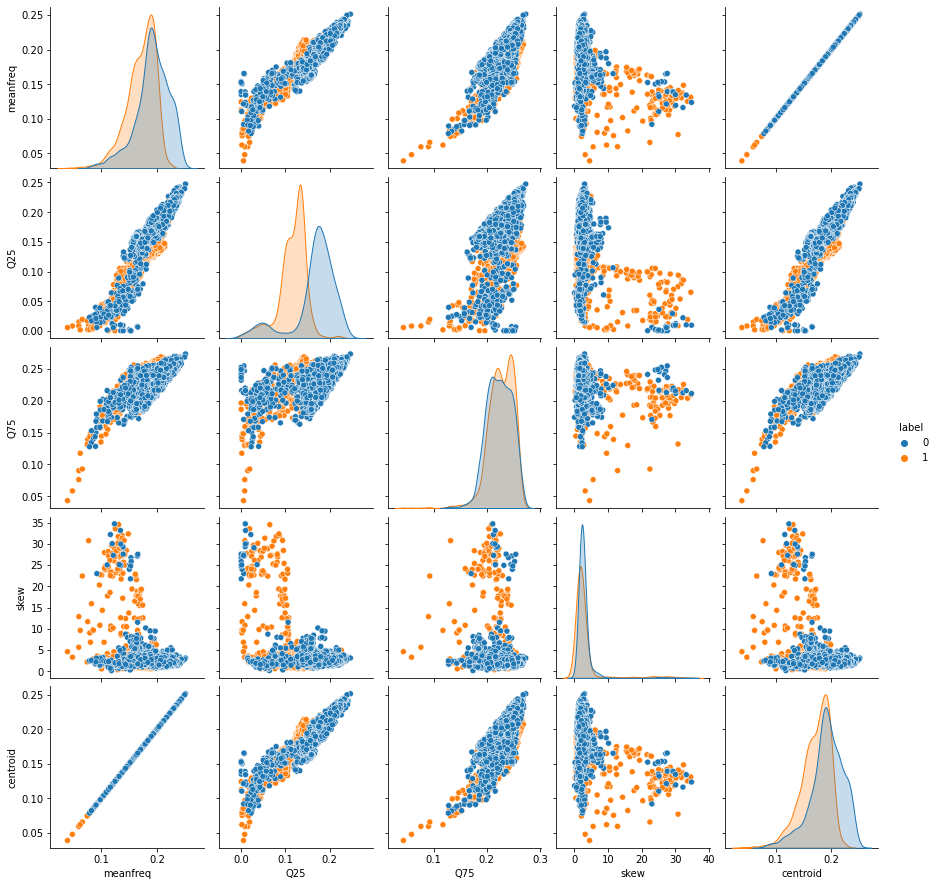

In [10]:
sns.pairplot(voiceDf[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label']], hue='label');

**Pairplot построен для демонстрации взаимосвязей между признаками в наборе данных. Мы видим, что асимметрия и квартили имеют слабую связь, в отличие от "meanfreq" и "центроида", между которыми наблюдается сильная связь.**

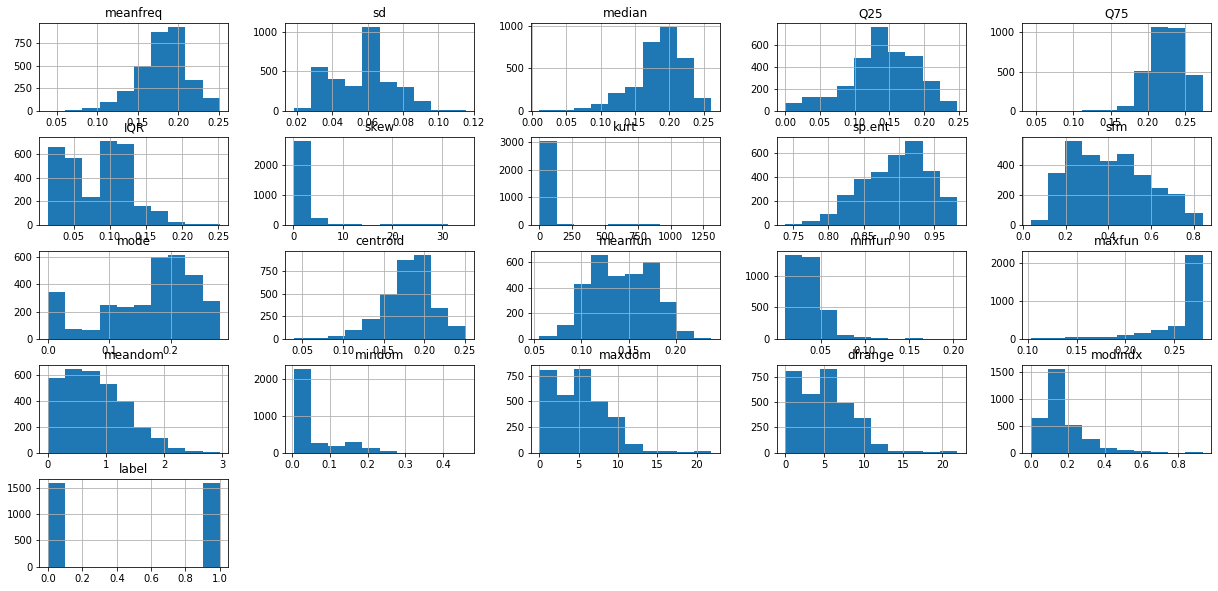

In [11]:
voiceDf.hist(figsize=(21, 10))
plt.show()

Выше представлены столбчатые диаграммы, которые позволяют увидеть наличие выбросов в данных. Изучив их, мы можем заметить, что __данные содержат не много выбросов__. Наибольшее количество выбросов наблюдается в признаках "асимметрия" и "эксцесс".   
Мы видим, что __данные не смещены__, так как они __равномерно распределены между классами__ (50% мужчин, 50% женщин) - __дисбаланс классов отсутствует__.

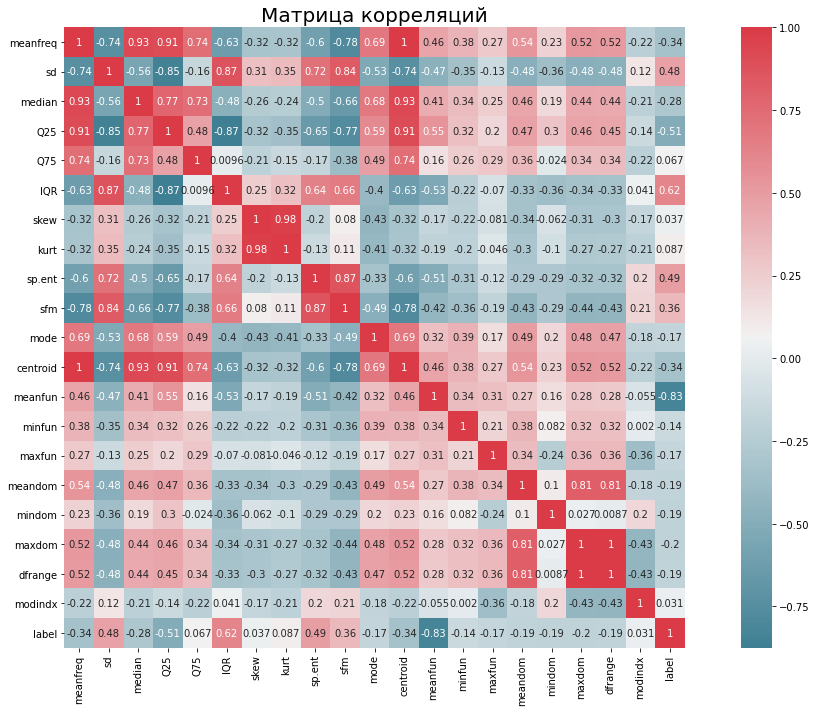

In [12]:
f, ax = plt.subplots(figsize=(16, 10))
corr = voiceDf.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

plt.title('Матрица корреляций', fontsize=20)
plt.tight_layout()
plt.show()

**Эта тепловая карта показывает корреляции между признаками.   
Заметим положительную корреляцию между label и IQR, label и sp.ent, а также сильную отрицательную корреляцию между label и meanfun.**

## Предобработка данных

**Сначала мы разделяем набор данных на объекты, классы**

In [13]:
gender_label = voiceDf.iloc[:, -1].to_numpy()
voiceDf1 = voiceDf.iloc[:, :-1]

**Затем делим на тренировочную и тестовые выборки**

In [14]:
voiceX_train, voiceX_test, voiceY_train, voiceY_test = train_test_split(voiceDf1, gender_label, test_size=0.3, random_state=42)

**Стандартизация признаков**
- Обучаем scaler на тренировочных признаках
- Трансформируем тестовые. 


In [15]:
scaler = StandardScaler()
voiceX_train = scaler.fit_transform(voiceX_train)
voiceX_test = scaler.transform(voiceX_test)

## Модели машинного обучения

### К-Ближайших соседей (KNN)

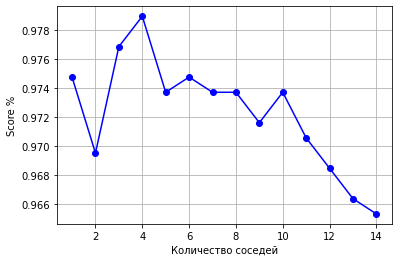

In [16]:
# KNN test run to determine the optimal n_neighbors
knn_valid_score_list = []
n_neighbors_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

for i in range(1,15):
    test_knn = KNeighborsClassifier(n_neighbors=i)
    test_knn.fit(voiceX_train, voiceY_train)
    knn_valid_score_list.append(test_knn.score(voiceX_test, voiceY_test))
    
plt.plot(n_neighbors_num,  knn_valid_score_list, "b")
plt.plot(n_neighbors_num,  knn_valid_score_list, "bo")
plt.xlabel("Количество соседей")
plt.ylabel("Score %")
plt.grid(True)
plt.show()

**Лучший результат при n_neighbors = 4, используем такое значение параметра.** 

In [17]:
# Учим лучшую модель
knn = KNeighborsClassifier(n_neighbors=4).fit(voiceX_train, voiceY_train)

# Предсказываем
voice_pred_knn=knn.predict(voiceX_test)
prf_knn=precision_recall_fscore_support(voiceY_test, voice_pred_knn, average='macro')

# Смотрим метрики 
voice_score_knn = accuracy_score(voice_pred_knn, voiceY_test)
accuracy_results_knn = cross_val_score(knn, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_knn = prf_knn[0]
Recall_knn = prf_knn[1]
f1_knn = prf_knn[2]

После вычисления метрик строим confusion_matrix

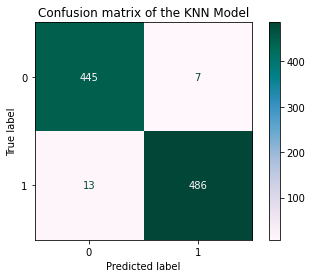

In [18]:
plot_confusion_matrix(knn, voiceX_test, voiceY_test, cmap='PuBuGn')
plt.title('Confusion matrix of the KNN Model')
plt.show()

### Метод Опорных Векторов (SVM)

In [19]:
svm = SVC().fit(voiceX_train, voiceY_train)

voice_pred_svm=svm.predict(voiceX_test)
prf_svm=precision_recall_fscore_support(voiceY_test, voice_pred_svm, average='macro')

voice_score_svm = accuracy_score(voice_pred_svm, voiceY_test)
accuracy_results_svm = cross_val_score(svm, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_svm = prf_svm[0]
Recall_svm = prf_svm[1]
f1_svm = prf_svm[2]

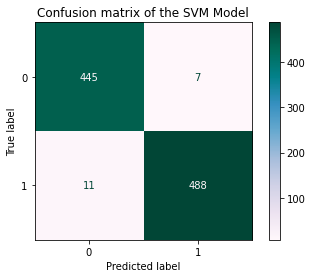

In [20]:
plot_confusion_matrix(svm, voiceX_test, voiceY_test, cmap='PuBuGn')
plt.title('Confusion matrix of the SVM Model')
plt.show()

### Случайный лес (Random Forest)

In [21]:
rf = RandomForestClassifier(n_estimators=100).fit(voiceX_train, voiceY_train)

voice_pred_rf = rf.predict(voiceX_test)
prf_rf=precision_recall_fscore_support(voiceY_test, voice_pred_rf, average='macro')

voice_score_rf = accuracy_score(voice_pred_rf, voiceY_test)
accuracy_results_rf = cross_val_score(rf, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_rf = prf_rf[0]
Recall_rf = prf_rf[1]
f1_rf = prf_rf[2]

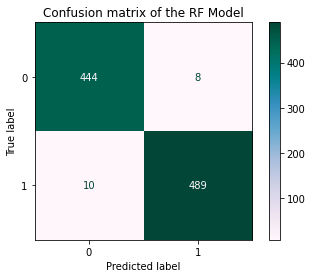

In [22]:
plot_confusion_matrix(rf,voiceX_test, voiceY_test, cmap='PuBuGn')
plt.title('Confusion matrix of the RF Model')
plt.show()

**Также мы можем определить важность каждого признака согласно Random Forest Classifier и отобразить это на линейном графике.**

In [23]:
rf_importance = rf_feat_importance(rf, voiceDf1)
rf_importance.sort_values(by='Importance', ascending=False)

,cols,Importance
12,meanfun,0.328481
5,IQR,0.177447
3,Q25,0.159978
1,sd,0.081359
8,sp.ent,0.055231
9,sfm,0.041644
11,centroid,0.022923
0,meanfreq,0.018975
10,mode,0.015938
2,median,0.015347


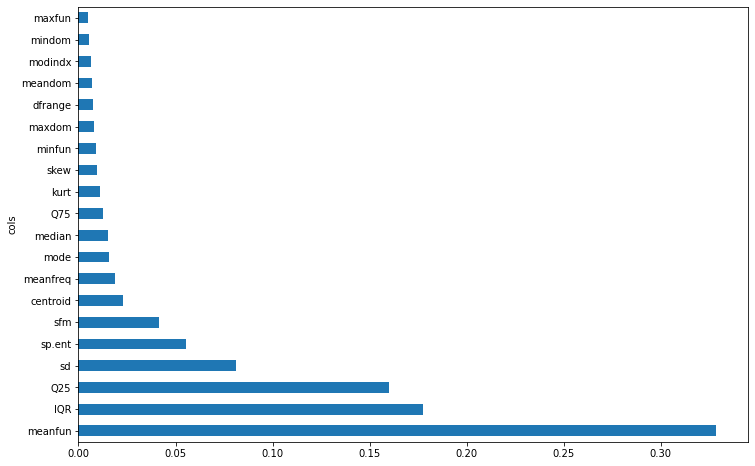

In [24]:
plot_fi(rf_importance);

**Так, ```meanfun``` является наиболее важным признаком среди всех, затем следует ```IQR```.**

## Кривые обучения
Строим графики кривых обучения для каждой модели, чтобы дать дополнительную информацию о производительности моделей

In [25]:
knn_train_sizes, knn_train_scores, knn_valid_scores, *_ = learning_curve(knn, voiceX_train, voiceY_train, n_jobs=-1,
                                                        random_state=42, cv=3)

svm_train_sizes, svm_train_scores, svm_valid_scores, *_ = learning_curve(svm, voiceX_train, voiceY_train, n_jobs=-1,
                                                        random_state=42, cv=3)

rf_train_sizes, rf_train_scores, rf_valid_scores, *_ = learning_curve(rf, voiceX_train, voiceY_train, n_jobs=-1,
                                                        random_state=42, cv=3)

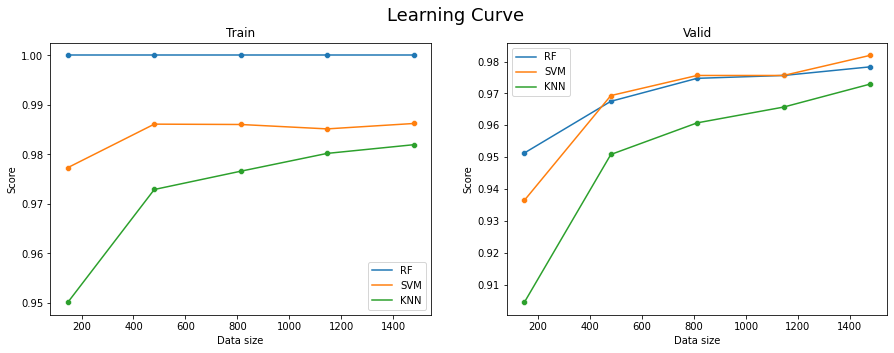

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Learning Curve', fontsize=18)

# Графики обучения
sns.scatterplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
axes[0].set_title('Train')
axes[0].set_xlabel('Data size')
axes[0].set_ylabel('Score')
axes[0].legend(['RF', 'SVM', 'KNN'])

# Графики тестовых 
sns.scatterplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
axes[1].set_title('Valid')
axes[1].set_xlabel('Data size')
axes[1].set_ylabel('Score')
axes[1].legend(['RF', 'SVM', 'KNN'])

plt.show()

### Таблица оценки производительности моделей

Ниже представленная таблица сравнивает примененные модели с использованием различных метрик оценки: model.score, кросс-валидация, точность, полнота, F1-оценка,  `model.score`, `Cross Validation`,  `Precision`, `Recall`, `F1 Score` чтобы увидеть, какая модель является оптимальной для этого набора данных.

In [27]:
model_performance_table = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'RF'],
    'Model Score': [voice_score_svm, voice_score_knn, voice_score_rf],
    'Cross Validation': [accuracy_results_svm, accuracy_results_knn, accuracy_results_rf],
    'Valid Precision': [Precision_svm, Precision_knn, Precision_rf],
    'Valid Recall': [Recall_svm, Recall_knn, Recall_rf],
    'Valid F1 Score': [f1_svm, f1_knn, f1_rf]
})

model_performance_table.sort_values(by="Model Score", ascending=False)

,Model,Model Score,Cross Validation,Valid Precision,Valid Recall,Valid F1 Score
0,SVM,0.981073,0.980602,0.980868,0.981235,0.981034
2,RF,0.981073,0.978800,0.980938,0.981130,0.981030
1,KNN,0.978970,0.973388,0.978708,0.979231,0.978930


---
SVM оказалась лидером по всем метрикам, включая точность модели, точность кросс-валидации, точность валидации, полноту валидации и F1-оценку валидации. Это говорит о высокой надежности и эффективности этой модели.

KNN показала немного меньшие результаты по сравнению с SVM, но все равно достаточно высокие, чтобы считать эту модель эффективной. Она может быть хорошим выбором в случаях, когда SVM не подходит по каким-либо причинам.

В общем, все три модели показали хорошие результаты, что говорит об их эффективности в решении задачи распознавании голоса, а классификации пола по голосу.

---